<a href="https://colab.research.google.com/github/JJungEEun/DL_basic/blob/main/Image_Classifier_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gradient Descent

- 실습 코드: [PyTorch_TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- dataset: CIFAR10 데이터셋
1. CNN network 준비
2. Loss function 정의
3. Train dataset을 CNN 네트워크 학습
4. CNN 네트워크로 test datset 예측
----


#### 1. Load and Normalize CIFAR10

- <mark>torchvision</mark>을 사용해, 쉽게 CIFAR10 데이터 준비
- Dataset -> torchivision.transform를 사용해 Tensor 변환 -> Data loader

In [ ]:
import torch
import torchvision 
import torchvision.transforms as transforms #data loading, normalize

In [ ]:
# dataset -> tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset'

# train dataset 
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# test dataset
testset = torchvision.datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


- DataLoader: ImageFolder 객체를 활용해 인스턴스를 생성한 후, 하나씩 데이터를 가지고오는 작업 수행
- transform을 통해 tensor 변환
- transform 라이브러리를 이용해 normalization, crop, rotation 등 다양한 일 가능
- DataLoader 클래스는 ImageFolder로부터 생성된 인스턴스를 인자로 받아 Load하는 기능을 가지고 있다.
    - batch: 반복문 돌 때 몇개의 이미지를 가져올지
    - sampler: 데이터 불균형 관련
    - num_worker: I/O 작업 시 사용할 CPU의 수
    - suffle: 이미지 랜덤하게 섞을 지



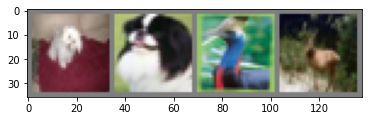

dog   dog   bird  deer 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### 2. Define a Convolution Neurl Network

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F

# CNN 네트워크 
class Net(nn.Module):
    def __init__(self):
        # conv2d와 MaxPool2d, Linear를 사용한 구조
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### 3. Define a Loss function and optimizer

In [ ]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss() #Loss function = Cross-entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #

#### 4. Train the network

In [ ]:
for epoch in range(2):  # epoch = 2

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): 
        # get the inputs; data is a list of [inputs, labels]
        # 각 배치 당 실행
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #foward-propagation
        loss = criterion(outputs, labels) #loss function: criterion
        loss.backward() #derivation 계산
        optimizer.step() #back-propagation: optimize

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.896
[1,  6000] loss: 1.696
[1,  8000] loss: 1.594
[1, 10000] loss: 1.525
[1, 12000] loss: 1.488
[2,  2000] loss: 1.416
[2,  4000] loss: 1.377
[2,  6000] loss: 1.359
[2,  8000] loss: 1.315
[2, 10000] loss: 1.310
[2, 12000] loss: 1.305
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### 5. Test the network on the test data

In [ ]:
"""
  전체 데이터 성능 확인하기
    정확도 측정: (맞은 image 개수) / (전체 image 개수 = 맞은 image + 틀린 image) 
"""
# net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
# 우리는 train하는 단계가 아니므로, 혹시 모르니 gradient descent는 꺼놓도록 하겠습니다.
with torch.no_grad():
    for data in testloader: #test loader에서 데이터들을 하나씩 꺼냅니다.
        images, labels = data
        outputs = net(images) #image를 net에 넣으면 class당 probability를 출력합니다.
        _, predicted = torch.max(outputs.data, 1) #가장 높은 probability를 가지는 class에게 1을 부여합니다.
        total += labels.size(0)
        correct += (predicted == labels).sum().item() #해당 class가 맞다면 correct에 포함합니다.

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
